## Capstone 2 - New York CIty Tree Census 

### Table of contents
1. [Background](#Background)
     -   1.1 [Data Source](#Data-Source)
     -   1.2 [Objective](#Objective)
     
     
2. [Loading Data](#Loading-Data)
     -   2.1 [Load libraries](#Load-libraries)
     -   2.2 [Load Dataset](#Load-Dataset)
     
     
3. [Data Quality Check](#Data-Quality-Check)
     -   3.1 [Duplicate Values](#Duplicate-Values)
     -   3.2 [Missing Values](#Missing-Values)
     -   3.3 [Outliers](#Outliers)
     
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)   
     -   4.1 [Count of Trees by health status](#Count-of-Trees-by-health-status)
     -   4.2 [Countof Trees by location and health](#Count-of-Trees-by-location-and-health)
     -   4.3 [Diameter of Trees](#Diameter-of-Trees)
           - 4.3.1[ 
     

### Background
    
TreesCount! 2015-2016, New York City's third street tree census, brought more than 2,200 volunteers together in the largest participatory municipal urban forestry project in United States history. Using both high tech tools and survey wheels, tape measures, and tree identification keys, citizen mappers helped us create a spatially accurate digital inventory of NYC’s street trees.

Using this data, one can explore city’s urban forest, learn about the species, size and ecological benefits of individual trees, record  tree care activities, and share stewardship actions and  favorite trees with friends.

#### 1.1 Data Source

Using NYC Open Data's [2015 Street Tree Census Data Set](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35) (to download the dataset, click **Export** for the non-geospatial version)

#### 1.2 Problem Statement / Objective
To identify factors/variables that contribute to the health of the tree and develop a machine learning model to predict the health of the tree 

<div class="alert alert-warning">
  <strong>Warning!</strong> Indicates a warning that might need attention.
</div>

<div class="alert alert-danger">
  <strong>Danger!</strong> Indicates a dangerous or potentially negative action.
</div>

### Loading Data 

#### 2.1 Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-success">
  <strong>Success!</strong> Successfully loaded all the required libraries.
</div>

#### 2.2 Load Data Set 

In [2]:
df=pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

<div class="alert alert-success">
  <strong>Success!</strong> Successfully loaded the data.
</div>

In [3]:
df.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


In [4]:
df.shape

(683788, 45)

### Data Quality Check

#### 3.1 Duplicate Values

In [5]:
if len(df[df.duplicated(keep=False)]) ==0:
    print("There is no duplicated records in the NYC Tree dataset")
else:
    print("There are duplicated records in the NYC Tree dataset. Please indetify the reasons and work to fix")

There is no duplicated records in the NYC Tree dataset


<div class="alert alert-success">
  <strong>Success!</strong> There is no duplicated values in the dataset.
</div>

#### 3.2 Missing Values

In [6]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state      

In [7]:
tree_status = df.groupby('status').size()
tree_status

status
Alive    652173
Dead      13961
Stump     17654
dtype: int64

In [125]:
tree = df.dropna(axis = 0, how ='any')

In [112]:
tree.isnull().sum()

tree_id             0
block_id            0
created_at          0
tree_dbh            0
stump_diam          0
curb_loc            0
status              0
health              0
spc_latin           0
spc_common          0
steward             0
guards              0
sidewalk            0
user_type           0
problems            0
root_stone          0
root_grate          0
root_other          0
trunk_wire          0
trnk_light          0
trnk_other          0
brch_light          0
brch_shoe           0
brch_other          0
address             0
postcode            0
zip_city            0
community board     0
borocode            0
borough             0
cncldist            0
st_assem            0
st_senate           0
nta                 0
nta_name            0
boro_ct             0
state               0
latitude            0
longitude           0
x_sp                0
y_sp                0
council district    0
census tract        0
bin                 0
bbl                 0
dtype: int

In [57]:
tree.shape

(642961, 45)

<div class="alert alert-success">
  <strong>Success!</strong> Successfully removed the stump and dead tree from the dataset along with 9559 rows as they were missing location.
</div>

#### 3.3 Data type conversion

In [10]:
tree['created_at']=pd.to_datetime(tree['created_at'])

C:\Users\parij\AppData\Local\Temp/ipykernel_19180/2473065387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree['created_at']=pd.to_datetime(tree['created_at'])


<div class="alert alert-success">
  <strong>Success!</strong> Successfully converted the data type</div>

### Exploratory Data Analysis

#### 4.1 Count of Trees by health status

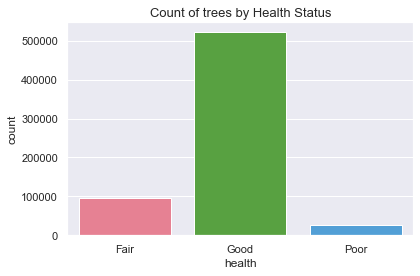

In [51]:
sns.set_theme(style='darkgrid')
sns.countplot(x="health", data=tree, palette="husl")
plt.title('Count of trees by Health Status', size=13)
plt.tight_layout()
plt.show()

In [60]:
# percent = len(tree[tree['health']=='Good'])/len(tree)
# percent

In [59]:
round(tree.health.value_counts(normalize=True), 4) * 100

Good    81.14
Fair    14.77
Poor     4.10
Name: health, dtype: float64

<div class="alert alert-info">
  <strong>Finding!</strong> 81% of trees in dataset are in good health.
</div>

#### 4.2 Tree count by location

In [37]:
# To get unique values in curb_loc
print(f"Unique location of the tree: {tree['curb_loc'].unique()}")

Unique location of the tree: ['OnCurb' 'OffsetFromCurb']


In [38]:
curb_df = tree[['curb_loc','health','tree_id']]

In [39]:
curb_df = curb_df.groupby(['curb_loc','health']).agg(h_count =('health', 'count'))
curb_df = curb_df.reset_index()

In [40]:
curb_df

,curb_loc,health,h_count
0,OffsetFromCurb,Fair,3892
1,OffsetFromCurb,Good,20257
2,OffsetFromCurb,Poor,912
3,OnCurb,Fair,91052
4,OnCurb,Good,501417
5,OnCurb,Poor,25431


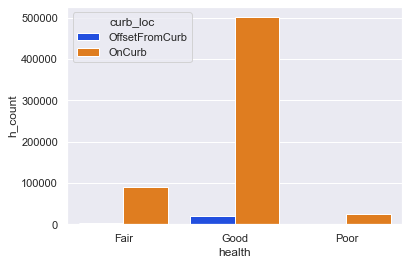

In [58]:
sns.barplot(x = 'health',
            y = 'h_count',
            hue = 'curb_loc',
            data = curb_df,
           palette='bright')
 
# Show the plot
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Most of the trees in dataset are planted on the curb.
</div>

#### 4.3 Diameter of the Trees 

In [83]:
round(tree[['health', 'tree_dbh']].groupby('health', as_index=False).mean(), 2)

,health,tree_dbh
0,Fair,11.01
1,Good,11.99
2,Poor,9.03


In [84]:
tree[['health', 'tree_dbh']].groupby('health', as_index=False).median()

,health,tree_dbh
0,Fair,9.0
1,Good,10.0
2,Poor,7.0


<div class="alert alert-info">
  <strong>Finding!</strong> Healthy trees (Good and Fair) have diameter larger than trees in poor health.
</div>

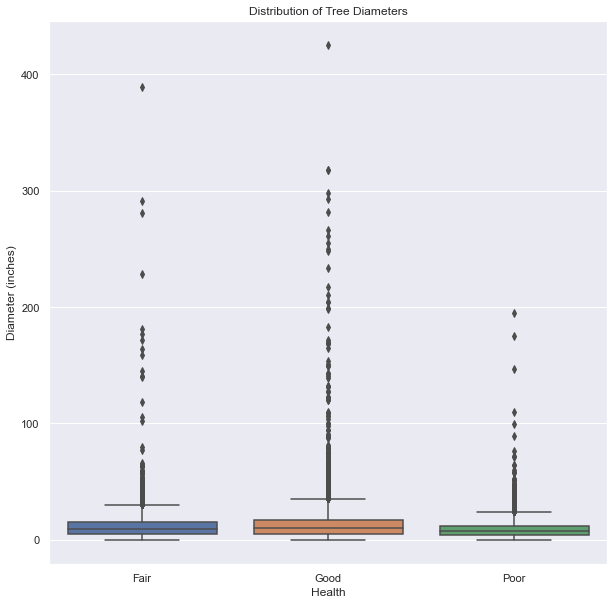

In [82]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='health', y='tree_dbh', data=tree)
ax.set_xlabel('Health')
ax.set_ylabel('Diameter (inches)')
ax.set_title('Distribution of Tree Diameters')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> The diameter breast at height for trees has a wide range with few outliers
</div>

In [71]:
tree['tree_dbh'].describe()

count    642961.000000
mean         11.721552
std           8.641866
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

#### 4.3.1 Distribution by diameter 

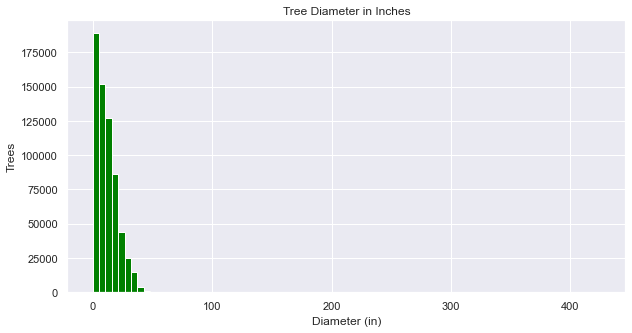

In [85]:
# distribution plot
plt.figure(figsize=(10, 5))

tree.tree_dbh.plot(kind='hist', bins=80, color='green', edgecolor='white')
plt.title('Tree Diameter in Inches')
plt.xlabel('Diameter (in)')
plt.ylabel('Trees')
plt.show()

In [72]:
# number of rows that have 0 as the diameteer
tree[tree.tree_dbh == 0].shape

(220, 45)

<div class="alert alert-danger">
  <strong>Question for Yunna!</strong> There are 220 trees with zero diameter. How is possible to have a zero diameter. This looks like an data entry error. Should this be imputed with mean
</div>

In [77]:
tree_50 = tree[tree.tree_dbh > 50]
tree_50.shape

(353, 45)

<div class="alert alert-info">
  <strong>Finding!</strong> In this large dataset there are only 353 trees with diameter more than 50 inches
</div>

#### 4.3.2 Distribution by diameter more than 50 

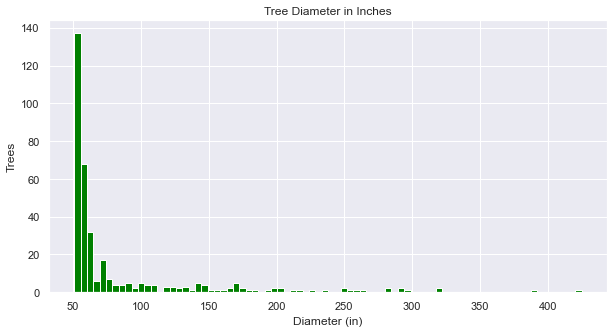

In [78]:
# distribution plot
plt.figure(figsize=(10, 5))

tree_50.tree_dbh.plot(kind='hist', bins=80, color='green', edgecolor='white')
plt.title('Tree Diameter in Inches')
plt.xlabel('Diameter (in)')
plt.ylabel('Trees')
plt.show()

#### 4.3.3 Distribution by diameter less than 50 

In [80]:
tree_1to50 = tree[tree.tree_dbh < 50]
tree_1to50.shape

(642567, 45)

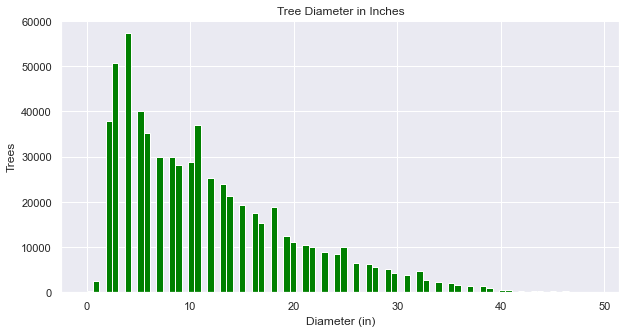

In [81]:
# distribution plot
plt.figure(figsize=(10, 5))

tree_1to50.tree_dbh.plot(kind='hist', bins=80, color='green', edgecolor='white')
plt.title('Tree Diameter in Inches')
plt.xlabel('Diameter (in)')
plt.ylabel('Trees')
plt.show()

#### 4.4 Species of the tree - Common Name 

In [106]:
tree_spc = tree.groupby('spc_common').size().sort_values(ascending=False)
tree_spc

spc_common
London planetree    85843
honeylocust         63077
Callery pear        57975
pin oak             52393
Norway maple        33886
                    ...  
black pine             37
pitch pine             33
Osage-orange           28
Scots pine             23
Virginia pine          10
Length: 132, dtype: int64

<div class="alert alert-info">
  <strong>Finding!</strong> There are 132 kinds of trees in New York city and London planetree is the most common tree in the city
</div>

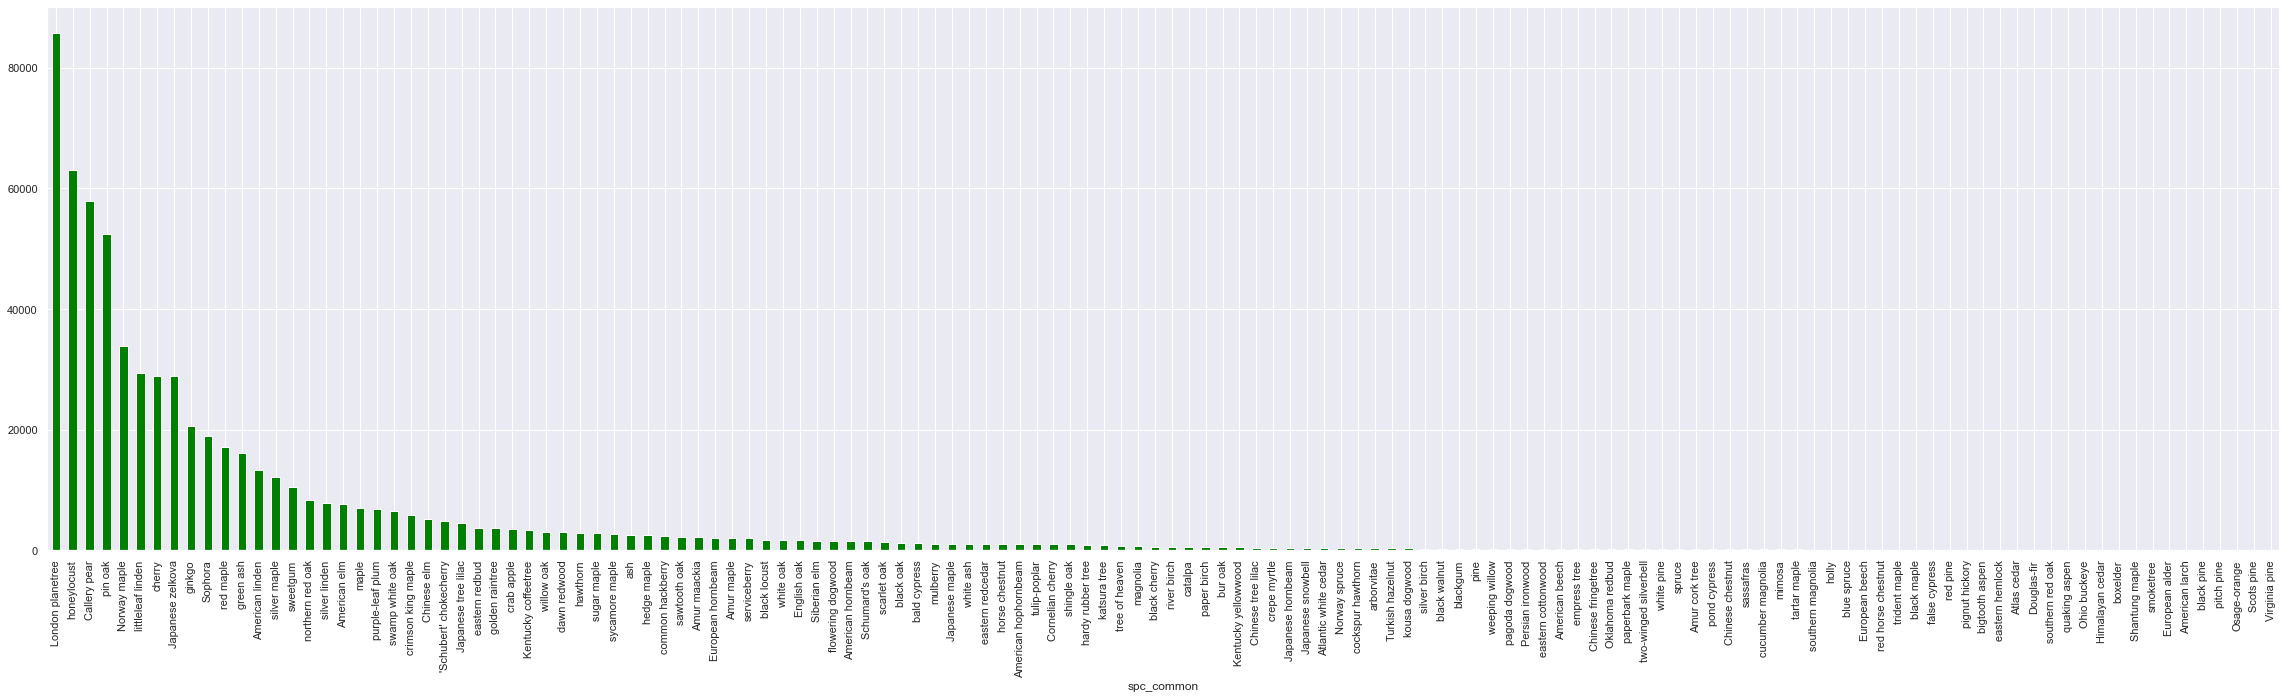

In [107]:
tree_spc.plot(kind='bar',color='green',figsize=(40, 10))
plt.show()

#### 4.5 Stewardship for Trees

Indicates the number of unique signs of stewardship observed forthis tree. Not recorded for stumps or dead trees.

Below is a short list of the most common examples of what counts as one stewardship activity:
- Helpful tree guards that do not appear professionally installed
- Mulch or woodchips
- Intentionally-planted flowers or other plants
- Signs related to care of the tree or bed, other than those installed by Parks
- Decorations (not including wires or lights added to the tree)
- Seating in the tree bed, usually as part of the tree guard
- Viewing someone performing a stewardship activity during the survey

#### 4.5.1 Stewardship by health

In [146]:
round(tree.groupby('health')['steward'].value_counts(normalize=True), 4) * 100

health  steward
Fair    None       74.23
        1or2       22.65
        3or4        2.91
        4orMore     0.21
Good    None       75.01
        1or2       21.79
        3or4        2.94
        4orMore     0.26
Poor    None       73.56
        1or2       23.47
        3or4        2.80
        4orMore     0.17
Name: steward, dtype: float64

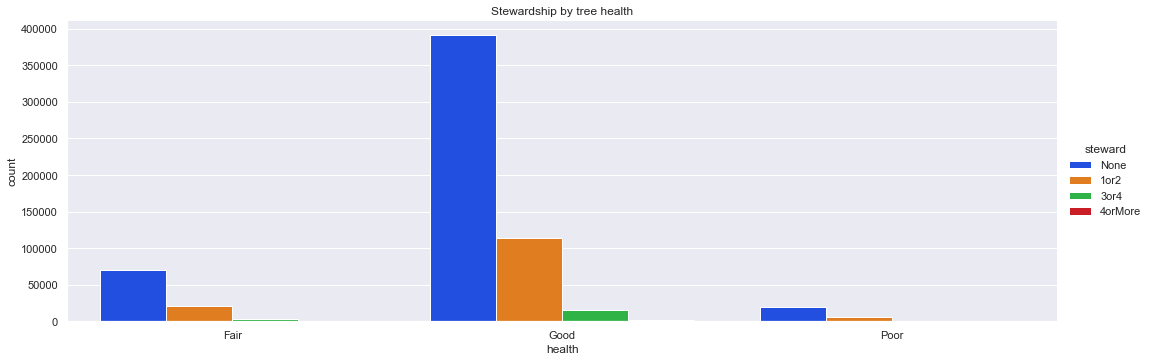

In [145]:
sns.catplot(x='health', hue='steward', kind='count', palette='bright', data=tree, aspect=3)
plt.title('Stewardship by tree health')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> There is not a major difference between distribution of tree stewardish by their health status</div>

#### 4.5.2 Stewardship by Borough

In [131]:
round(tree.groupby('borough')['steward'].value_counts(normalize=True), 4) * 100

borough        steward
Bronx          None       80.42
               1or2       18.44
               3or4        1.06
               4orMore     0.09
Brooklyn       None       70.29
               1or2       25.83
               3or4        3.56
               4orMore     0.32
Manhattan      None       47.81
               1or2       38.78
               3or4       12.52
               4orMore     0.89
Queens         None       81.00
               1or2       17.56
               3or4        1.29
               4orMore     0.14
Staten Island  None       79.95
               1or2       18.56
               3or4        1.38
               4orMore     0.11
Name: steward, dtype: float64

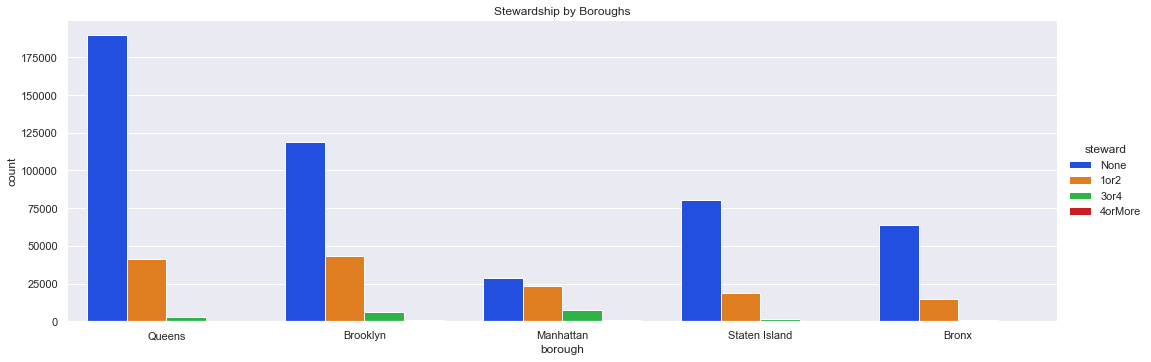

In [138]:
sns.catplot(x='borough', hue='steward', kind='count', palette='bright', data=tree, aspect=3)
plt.title('Stewardship by Boroughs')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Unlike other Boroughs, Manhattan has only 47 percent of trees with no stewardship activities</div>

#### 4.6 Guards

Indicates whether a guard is present, and if the user felt it was a helpful or harmful guard. Values Harmful, Helpful, and Unsure all indicate that a tree guard is present. A tree guard is considered 'helpful' if it doesn't impede water getting to the tree and does not raise the soil level or trap debris in the pit.

#### 4.6.1 Guards by health of trees

In [153]:
round(tree.groupby('health')['guards'].value_counts(normalize=True), 4) * 100

health  guards 
Fair    None       87.17
        Helpful     7.42
        Harmful     3.99
        Unsure      1.43
Good    None       87.93
        Helpful     8.05
        Harmful     2.90
        Unsure      1.12
Poor    None       86.50
        Helpful     7.67
        Harmful     4.11
        Unsure      1.72
Name: guards, dtype: float64

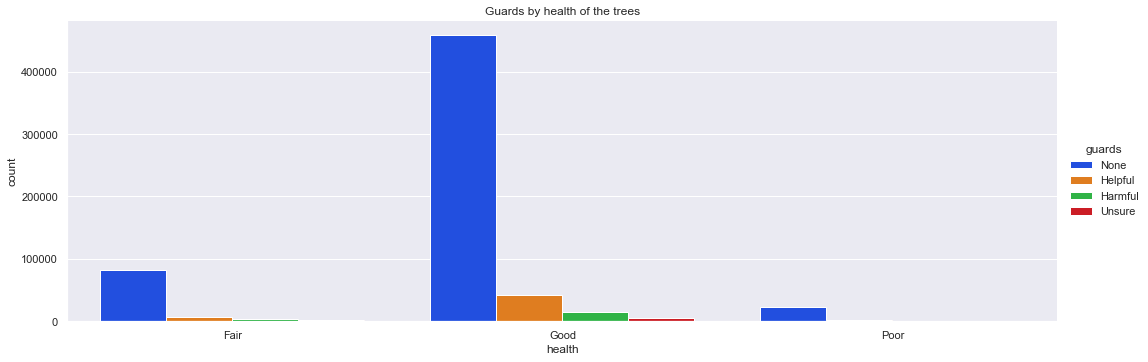

In [150]:
sns.catplot(x='health', hue='guards', kind='count', palette='bright', data=tree, aspect=3)
plt.title('Guards by health of the trees')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Helpful guards have 82% of trees are in good health followed by trees with no guards. And, most of the trees in good health have no guards</div>

#### 4.6.2 Guards by Borough

In [152]:
round(tree.groupby('borough')['guards'].value_counts(normalize=True), 4) * 100

borough        guards 
Bronx          None       92.44
               Helpful     5.74
               Harmful     1.21
               Unsure      0.60
Brooklyn       None       83.95
               Helpful    11.49
               Harmful     3.34
               Unsure      1.22
Manhattan      None       55.60
               Helpful    28.17
               Harmful    14.12
               Unsure      2.11
Queens         None       94.25
               Helpful     3.02
               Harmful     1.57
               Unsure      1.17
Staten Island  None       94.66
               Helpful     3.04
               Harmful     1.19
               Unsure      1.11
Name: guards, dtype: float64

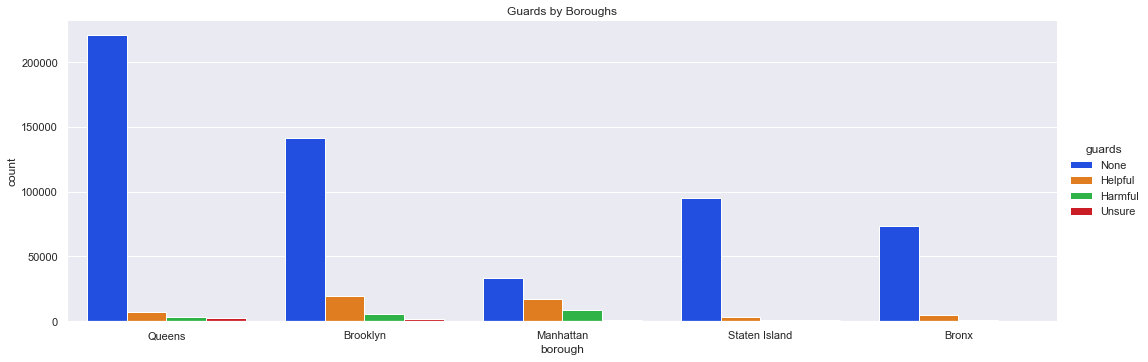

In [155]:
sns.catplot(x='borough', hue='guards', kind='count', palette='bright', data=tree, aspect=3)
plt.title('Guards by Boroughs')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> In Manhattan only 55% of trees have no guards.In other Boroughs the percent of trees with no gurads arrange between 80 to 95% </div

#### 4.7 Sidewalks 
Indicates whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted.

#### 4.7.1 Sidewalks by health of  trees 

In [169]:
round(tree.groupby('health')['sidewalk'].value_counts(normalize=True), 4) * 100

health  sidewalk
Fair    NoDamage    70.14
        Damage      29.86
Good    NoDamage    71.20
        Damage      28.80
Poor    NoDamage    75.29
        Damage      24.71
Name: sidewalk, dtype: float64

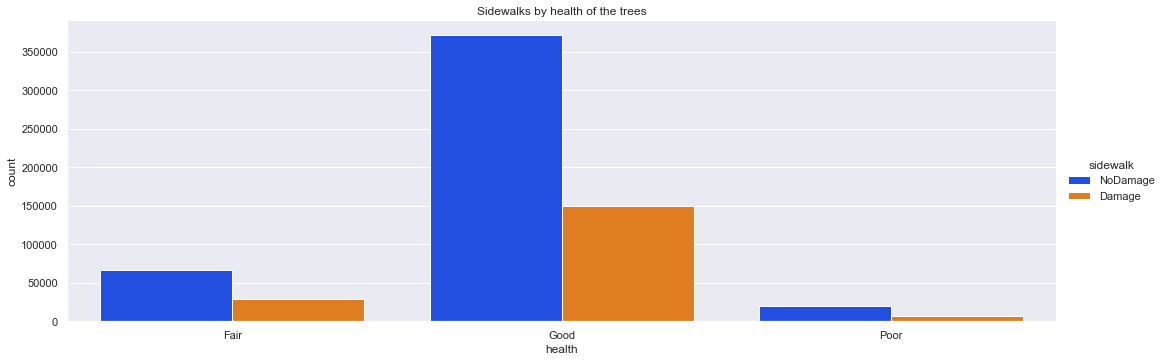

In [164]:
sns.catplot(x='health', hue='sidewalk', kind='count', palette='bright', data=tree, aspect=3)
plt.title('Sidewalks by health of the trees')
plt.show()

<div class="alert alert-info">
  <strong>Finding!</strong> Majortity of trees in all three health categoris have no sidewalk damange. Around 71% of trees have no sidewalk damange and 28% have damaged sidewalk, irrespective of health</div

#### 4.7.2 Sidewalk by Boroughs

In [171]:
round(tree.groupby('borough')['sidewalk'].value_counts(normalize=True), 4) * 100

borough        sidewalk
Bronx          NoDamage    70.78
               Damage      29.22
Brooklyn       NoDamage    65.52
               Damage      34.48
Manhattan      NoDamage    75.75
               Damage      24.25
Queens         NoDamage    71.78
               Damage      28.22
Staten Island  NoDamage    77.08
               Damage      22.92
Name: sidewalk, dtype: float64

<div class="alert alert-info">
  <strong>Finding!</strong> Compared to other boroughs, Brooklyn has more sidewalk damaage close to the trees</div

#### 4.8 User Types
This field describes the category of user who collected this tree point's data

In [172]:
# To get unique values in curb_loc
print(f"Status of Tree: {tree['user_type'].unique()}")

Status of Tree: ['TreesCount Staff' 'Volunteer' 'NYC Parks Staff']


In [189]:

tree.groupby('user_type').size().sort_values(ascending=False)

user_type
TreesCount Staff    277513
Volunteer           204729
NYC Parks Staff     160719
dtype: int64

<div class="alert alert-info">
  <strong>Finding!</strong> Tree data was collected byTreesCount Staff, Volunteers and NYC Park Staff.More than 40% of tree data was collected by Tree Count staff</div

#### 4.9 Problems 

In [190]:
# To get unique values in curb_loc
print(f"Status of Tree: {tree['problems'].unique()}")

Status of Tree: ['None' 'Stones' 'MetalGrates' 'RootOther' 'Stones,BranchOther'
 'TrunkLights,BranchLights' 'RootOther,TrunkOther,BranchOther'
 'BranchOther' 'Stones,BranchLights' 'TrunkOther,BranchLights'
 'MetalGrates,TrunkOther' 'TrunkOther' 'Stones,WiresRope' 'BranchLights'
 'WiresRope,BranchOther' 'RootOther,BranchOther'
 'Stones,WiresRope,BranchLights' 'WiresRope' 'WiresRope,BranchLights'
 'Stones,TrunkOther' 'WiresRope,TrunkLights,BranchLights'
 'Stones,RootOther' 'Stones,BranchLights,BranchOther'
 'Stones,RootOther,BranchLights' 'MetalGrates,BranchOther'
 'Stones,RootOther,TrunkOther' 'RootOther,TrunkOther'
 'Stones,TrunkOther,BranchLights,BranchOther'
 'Stones,TrunkOther,BranchOther' 'RootOther,BranchLights'
 'TrunkOther,BranchOther' 'RootOther,WiresRope,BranchLights'
 'Stones,TrunkOther,BranchLights' 'BranchLights,Sneakers'
 'Stones,RootOther,TrunkOther,BranchLights'
 'MetalGrates,TrunkOther,BranchOther' 'TrunkLights,BranchOther'
 'TrunkLights' 'Stones,RootOther,BranchOther' 